# Library Collection Data

In [49]:
import pandas as pd

collection = pd.read_csv('data/dartmouth-library-collection.csv', na_values='Unknown', dtype=str).dropna(subset='Dewey Classification Top Line')
collection['Num of Titles (Active)'] = collection['Num of Titles (Active)'].astype('int')

In [50]:
items_per_dewey = collection.groupby('Dewey Classification Top Line').sum(numeric_only=True)
items_per_dewey.reset_index(inplace=True)
items_per_dewey['top'] = items_per_dewey['Dewey Classification Top Line'].apply(lambda x: x[0])
items_per_dewey['mid'] = items_per_dewey['Dewey Classification Top Line'].apply(lambda x: x[1])
items_per_dewey['bot'] = items_per_dewey['Dewey Classification Top Line'].apply(lambda x: x[2])
items_per_dewey

,Dewey Classification Top Line,Num of Titles (Active),top,mid,bot
0,000,62,0,0,0
1,001,1637,0,0,1
2,002,177,0,0,2
3,003,981,0,0,3
4,004,10376,0,0,4
...,...,...,...,...,...
972,995,65,9,9,5
973,996,150,9,9,6
974,997,7,9,9,7
975,998,14,9,9,8


In [51]:
import plotly.express as px
fig = px.treemap(items_per_dewey, 
                 path=['top', 'mid'], 
                 values='Num of Titles (Active)',
                )
fig.show()

<AxesSubplot: xlabel='top'>

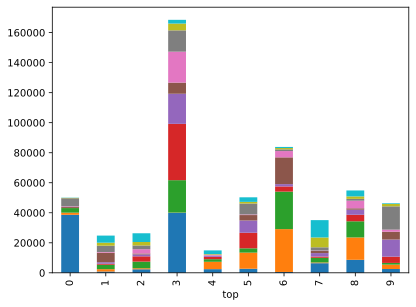

In [52]:
items_per_dewey.drop(columns=['Dewey Classification Top Line', 'bot']).groupby(['top', 'mid']).sum().unstack().plot.bar(stacked=True, legend=False)

In [53]:
items_per_dewey = items_per_dewey.drop(columns=['Dewey Classification Top Line'])
items_per_dewey['mid-bot'] = items_per_dewey.mid + '-' + items_per_dewey.bot

In [54]:
items_per_dewey = items_per_dewey.drop(columns=['mid', 'bot']).groupby(by=['top', 'mid-bot']).sum().unstack()
items_per_dewey

Num of Titles (Active)                                            \
mid-bot                    0-0     0-1     0-2     0-3      0-4      0-5   
top                                                                        
0                         62.0  1637.0   177.0   981.0  10376.0  16646.0   
1                        566.0    63.0     4.0    21.0     10.0     73.0   
2                       1042.0   644.0   161.0   130.0    181.0     75.0   
3                       1497.0  2299.0  4044.0  4731.0   2211.0  12136.0   
4                        298.0  1759.0     7.0     3.0    114.0     48.0   
5                        486.0   481.0   218.0    19.0      2.0    116.0   
6                        158.0    84.0    18.0     1.0     72.0     24.0   
7                       2095.0   735.0    86.0    10.0    630.0     68.0   
8                        274.0   803.0    20.0    14.0      7.0     25.0   
9                        228.0   287.0    12.0    13.0     31.0     47.0   

                                          ...                                 \
mid-bot      0-6     0-7     0-8     0-9  ...    9-0     9-1     9-2     9-3   
top                                       ...                                  
0         8763.0     2.0     0.0     0.0  ...   11.0   108.0     2.0     2.0   
1            1.0    31.0    25.0    57.0  ...  512.0   486.0   555.0  1549.0   
2           29.0    36.0    38.0    20.0  ...   83.0   408.0   256.0    22.0   
3        10165.0  2655.0    33.0   202.0  ...   74.0   284.0   137.0   136.0   
4            3.0    63.0    43.0   104.0  ...   26.0   492.0   479.0   107.0   
5           66.0   479.0   438.0   416.0  ...  205.0   524.0    49.0    26.0   
6            5.0    98.0    28.0    85.0  ...  272.0    69.0    28.0   116.0   
7           37.0   188.0   171.0  2399.0  ...  169.0  6236.0  1953.0   291.0   
8            7.0    38.0  3172.0  4312.0  ...   21.0  1625.0   632.0    29.0   
9            2.0   450.0    16.0  1446.0  ...    8.0     9.0     2.0    47.0   

                                                        
mid-bot     9-4     9-5     9-6     9-7     9-8    9-9  
top                                                     
0           7.0     NaN     8.0     2.0    11.0    1.0  
1         965.0   105.0    66.0    28.0   169.0  301.0  
2        1290.0    32.0  1569.0  1425.0     1.0  737.0  
3         608.0    70.0     9.0     2.0  1159.0    3.0  
4         123.0   532.0   125.0   215.0    62.0  259.0  
5          57.0   516.0    33.0   353.0   521.0  760.0  
6          20.0    14.0    69.0   126.0    10.0    NaN  
7         777.0    33.0  1841.0    99.0    40.0  118.0  
8         144.0  1322.0    36.0    57.0     7.0   76.0  
9         140.0    65.0   150.0     7.0    14.0    2.0  

[10 rows x 100 columns]

In [80]:
import colorsys

import matplotlib.colors

base_color = {
"0": "#9e0142",
"1": "#d53e4f",
"2": "#f46d43",
"3": "#fdae61",
"4": "#fee08b",
"5": "#e6f598",
"6": "#abdda4",
"7": "#66c2a5",
"8": "#3288bd",
"9": "#5e4fa2",
}

def get_shade(idx):
    base, shade = idx.split('-')
    h, s, v = colorsys.rgb_to_hsv(*matplotlib.colors.to_rgb(base_color[base]))
    v -= int(shade) * .03
    return colorsys.hsv_to_rgb(h, s, v)


colors = [get_shade(col) for _, col in items_per_dewey.columns] 

<AxesSubplot: xlabel='top'>

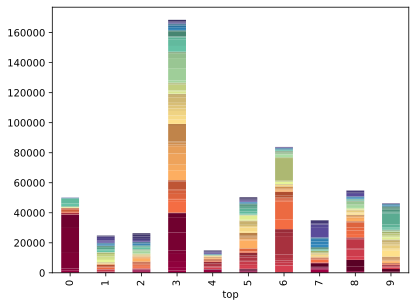

In [81]:
items_per_dewey.plot.bar(stacked=True, color=colors, legend=False)